In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_for_me/heart_data.txt',sep=' ', header=None)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [29]:
df.shape

(270, 14)

In [30]:
X=np.array(df.iloc[:, :-1])

In [31]:
X.shape

(270, 13)

In [32]:
X

array([[70.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  0.,  3., ...,  2.,  0.,  7.],
       [57.,  1.,  2., ...,  1.,  0.,  7.],
       ...,
       [56.,  0.,  2., ...,  2.,  0.,  3.],
       [57.,  1.,  4., ...,  2.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.]])

In [33]:
y= np.array(df.iloc[:,-1])

In [34]:
y

array([2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 2])

In [35]:
np.unique(y)

array([1, 2])

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [37]:
original_labels = le.classes_

In [38]:
original_labels

array([1, 2])

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [41]:
model = Sequential()

model.add(Dense(1024,activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
history= model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.5433 - loss: 13.4071 - val_accuracy: 0.3636 - val_loss: 6.8180
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5742 - loss: 7.7160 - val_accuracy: 0.7273 - val_loss: 0.5984
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5304 - loss: 5.1711 - val_accuracy: 0.3636 - val_loss: 1.3581
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5123 - loss: 3.7677 - val_accuracy: 0.3636 - val_loss: 2.9032
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5390 - loss: 3.8438 - val_accuracy: 0.6818 - val_loss: 0.6597
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5242 - loss: 2.5877 - val_accuracy: 0.6591 - val_loss: 0.6680
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4824 - loss: 2.2526 - val_accuracy: 0.6136 - val_loss: 0.6929
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5440 - loss: 1.4536 - val_accuracy: 0.6818 - val_los

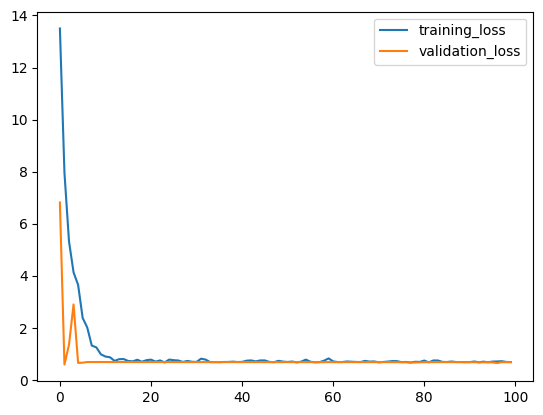

In [43]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

In [44]:
y_pred_probs = model.predict(X_test)
y_pred_binary = (y_pred_probs > 0.5).astype(int).reshape(-1)
#y_pred_labels = np.argmax(y_pred_probs, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [51]:
y_pred_probs

array([[0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.49245363],
       [0.492

In [45]:
y_pred_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
y_pred = le.inverse_transform(y_pred_binary)
y_test_original = le.inverse_transform(y_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
y_test_original

array([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2])

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

In [48]:
acc = accuracy_score(y_test_original, y_pred)
rec = recall_score(y_test_original, y_pred, average='weighted')
pre = precision_score(y_test_original, y_pred, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {pre:.4f}')
print(f'Recall: {rec:.4f}')

Accuracy: 0.6111
Precision: 0.3735
Recall: 0.6111


In [50]:
print('Classification Report : \n')
print(classification_report(y_test, y_pred_labels))

Classification Report : 

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        33
           1       0.00      0.00      0.00        21

    accuracy                           0.61        54
   macro avg       0.31      0.50      0.38        54
weighted avg       0.37      0.61      0.46        54



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
